<div align='center' style='background-color:#fad7d3;padding:20px'>
    <h1 style='color:#4e100a; font-size:30px'>Boston dataset regression</h1>
</div>

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Importing Libraries</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.datasets import load_boston
boston = load_boston()

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>EDA and Preparation</h2>
</div>

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
dataset = pd.DataFrame(boston.data , columns=boston.feature_names)
dataset.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
390,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54
241,0.10612,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
312,0.26169,0.0,9.90,0.0,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
261,0.53412,20.0,3.97,0.0,0.647,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
386,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93


In [6]:
dataset['Price'] = boston.target

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
dataset.shape

(506, 14)

In [9]:
dataset.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [10]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [12]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [13]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Understanding features</h2>
</div>

<AxesSubplot:>

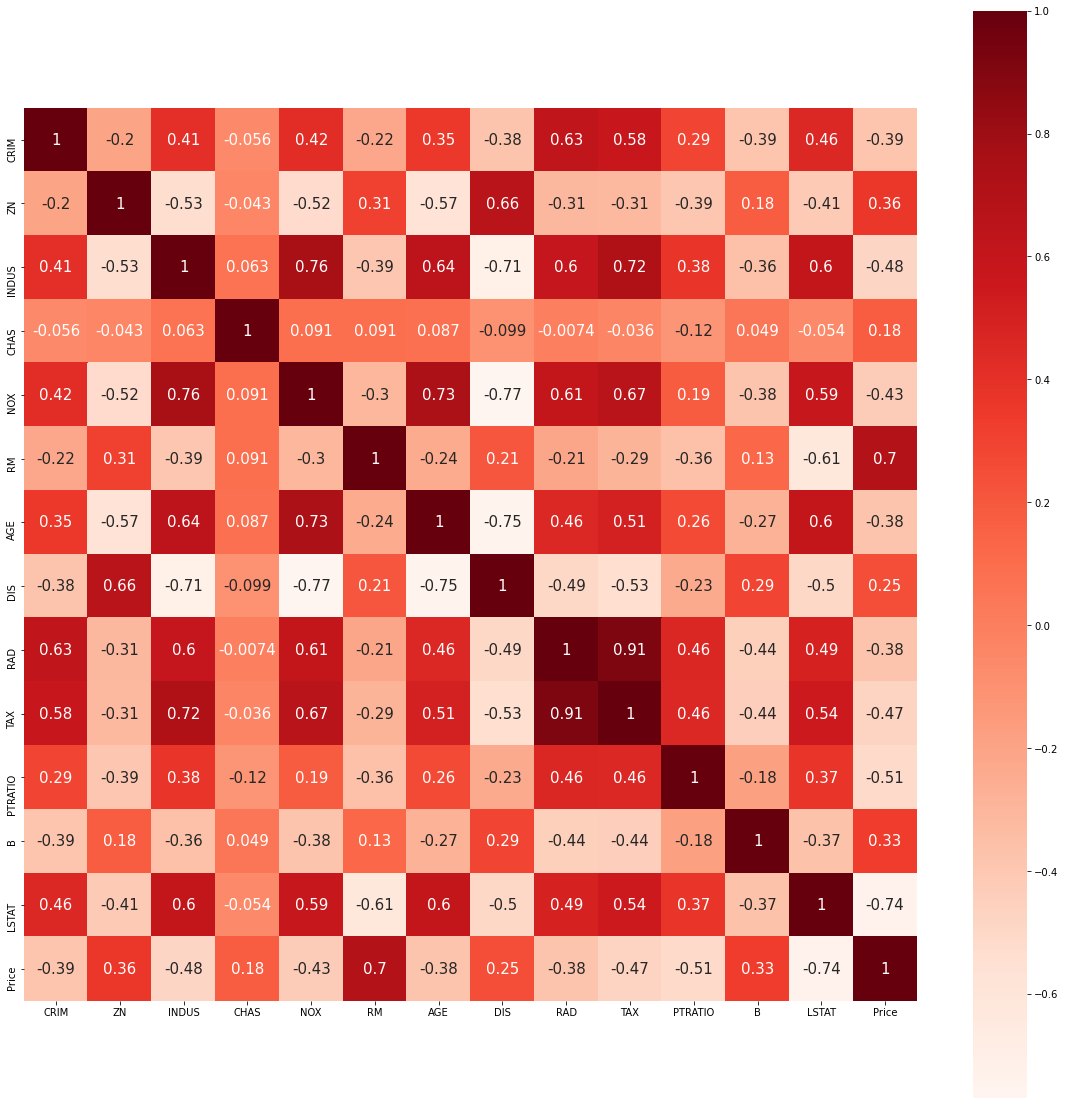

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr() , square=True , annot=True , annot_kws={'size' :15} , cmap='Reds')

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Simple linear regression (LSTAT) - Training model</h2>
</div>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
x = dataset[['LSTAT']]
x

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [17]:
y = dataset['Price']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)

In [19]:
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [20]:
coefficient = pd.DataFrame([x.columns , regressor.coef_]).T
coefficient = coefficient.rename(columns={0 : 'Attr' , 1 : 'Coef'})
coefficient

,Attr,Coef
0,LSTAT,-0.93622


In [21]:
regressor.intercept_

34.34642187867846

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Simple linear regression (LSTAT) - Evaluating model with train data</h2>
</div>

In [22]:
y_pred = regressor.predict(x_train)

<AxesSubplot:xlabel='Price', ylabel='Count'>

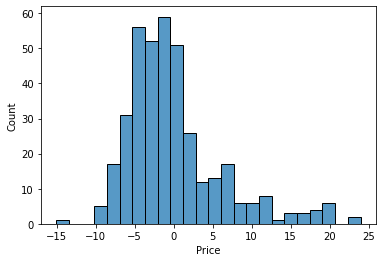

In [23]:
sns.histplot(y_train - y_pred)

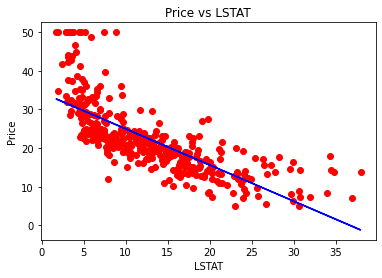

In [24]:
plt.scatter(x_train , y_train , color='red')
plt.plot(x_train , y_pred , color ='blue')
plt.title('Price vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

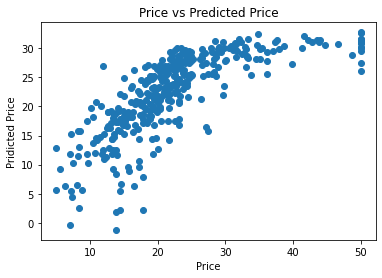

In [25]:
plt.scatter(y_train , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Pridicted Price')
plt.show()

In [26]:
print('R^2 : ' , metrics.r2_score(y_train , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_train , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_train , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_train , y_pred)))

R^2 :  0.5478579583420593
MAE :  4.5051340460550895
MSE :  38.45974000924018
RMSE :  6.201591731905623


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Simple linear regression (LSTAT) - Evaluating model with test data</h2>
</div>

In [27]:
y_pred = regressor.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Count'>

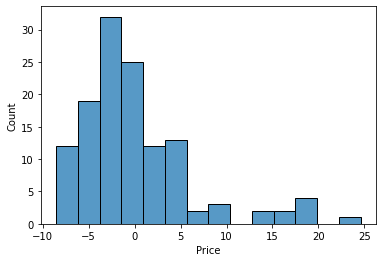

In [28]:
sns.histplot(y_test - y_pred)

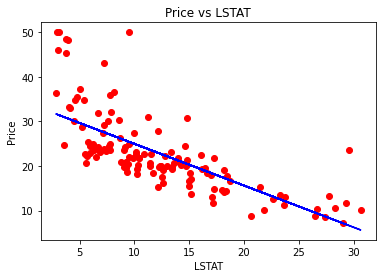

In [29]:
plt.scatter(x_test , y_test , color='red')
plt.plot(x_test , y_pred , color='blue')
plt.title('Price vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

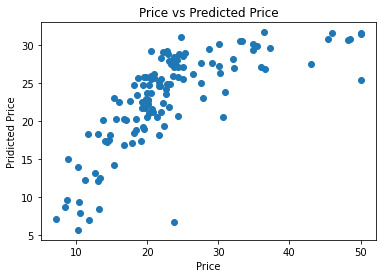

In [30]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Pridicted Price')
plt.show()

In [31]:
print('R^2 : ' , metrics.r2_score(y_test , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_test , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

R^2 :  0.5303215448532586
MAE :  4.447271964673958
MSE :  38.59525469567654
RMSE :  6.21250792318823


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Multiple linear regression - training model</h2>
</div>

In [32]:
x = dataset.iloc[: , :-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
y = dataset['Price']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)

In [35]:
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [36]:
coefficient = pd.DataFrame([x_train.columns , regressor.coef_]).T
coefficient = coefficient.rename(columns={0 : 'Attr' , 1 : 'Coeff'})
coefficient

,Attr,Coeff
0,CRIM,-0.114426
1,ZN,0.032219
2,INDUS,0.028868
3,CHAS,3.481292
4,NOX,-16.971589
5,RM,4.402872
6,AGE,-0.008414
7,DIS,-1.436074
8,RAD,0.236626
9,TAX,-0.010431


In [37]:
regressor.intercept_

31.84280689199261

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Multiple linear regression - Evaluating model with train data</h2>
</div>

In [38]:
y_pred = regressor.predict(x_train)

<AxesSubplot:xlabel='Price', ylabel='Count'>

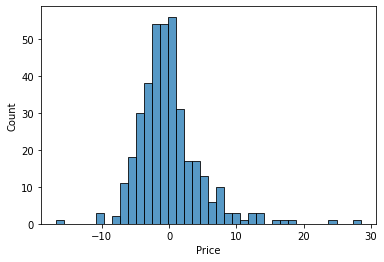

In [39]:
sns.histplot(y_train - y_pred)

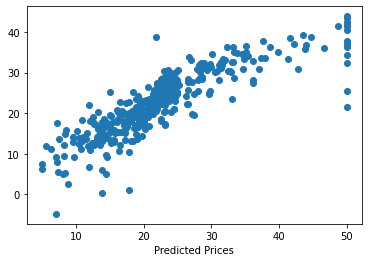

In [40]:
plt.scatter(y_train , y_pred)
plt.xlabel('Prices')
plt.xlabel('Predicted Prices')
plt.show()

In [41]:
print('R^2 : ' , metrics.r2_score(y_train , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_train , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_train , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_train , y_pred)))

R^2 :  0.7398592666295977
MAE :  3.250956525740685
MSE :  22.127880288574868
RMSE :  4.704028091813958


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Multiple linear regression - Evaluating model with test data</h2>
</div>

In [42]:
y_pred = regressor.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Count'>

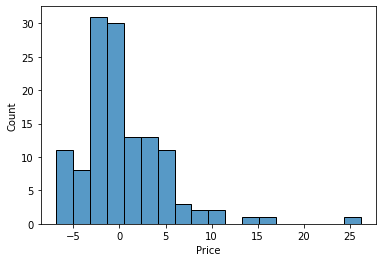

In [43]:
sns.histplot(y_test - y_pred)

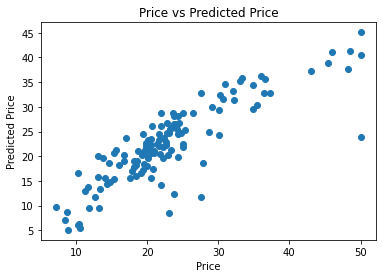

In [44]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

In [45]:
print('R^2 : ' , metrics.r2_score(y_test , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_test , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

R^2 :  0.7280271832946519
MAE :  3.223533306147867
MSE :  22.349034783304948
RMSE :  4.727476576706112


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Features linear visualization</h2>
</div>

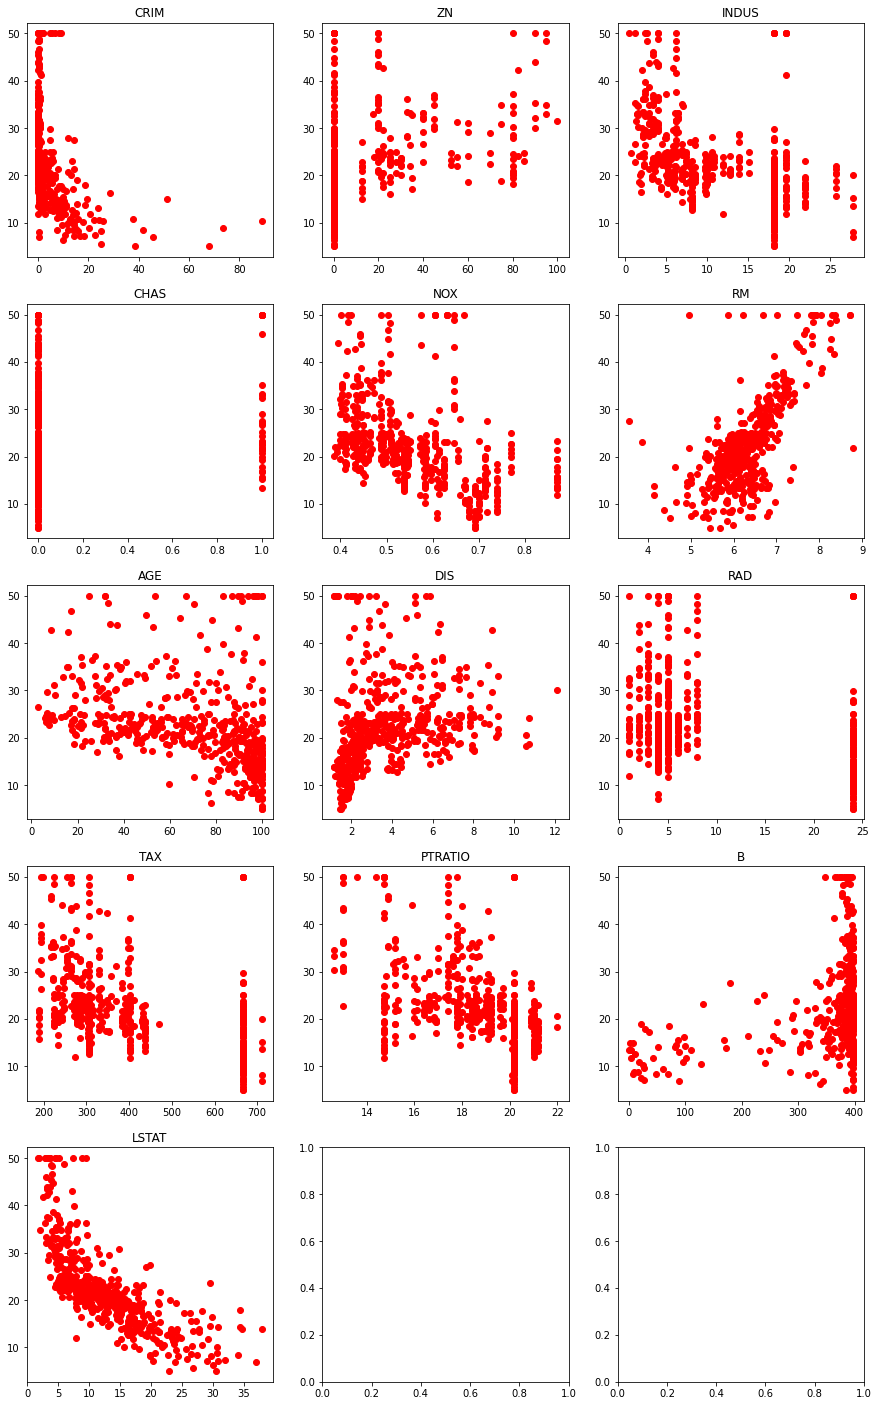

In [46]:
fig,ax = plt.subplots(5,3 , figsize=(15,25))
counter = 0

for i in range(0 , 5):
    for j in range(0 , 3):
        if counter == 13 :
            break
        ax[i,j].scatter(x.iloc[: , counter] , y , color='red')
        ax[i,j].set_title(x.columns[counter])
        counter +=1
        
plt.show()

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Simple linear regression visualization for each feature</h2>
</div>

R^2 for CRIM : 0.1519875215340204
R^2 for ZN : 0.2337220676949664
R^2 for INDUS : 0.30047579439024175
R^2 for CHAS : -0.004000974184012351
R^2 for NOX : 0.17180684640962685
R^2 for RM : 0.4327124693273302
R^2 for AGE : 0.14981509591537823
R^2 for DIS : 0.08240996912103937
R^2 for RAD : 0.12206262426646997
R^2 for TAX : 0.19840157798985625
R^2 for PTRATIO : 0.31935763447542553
R^2 for B : 0.12583796098828837
R^2 for LSTAT : 0.5303215448532586


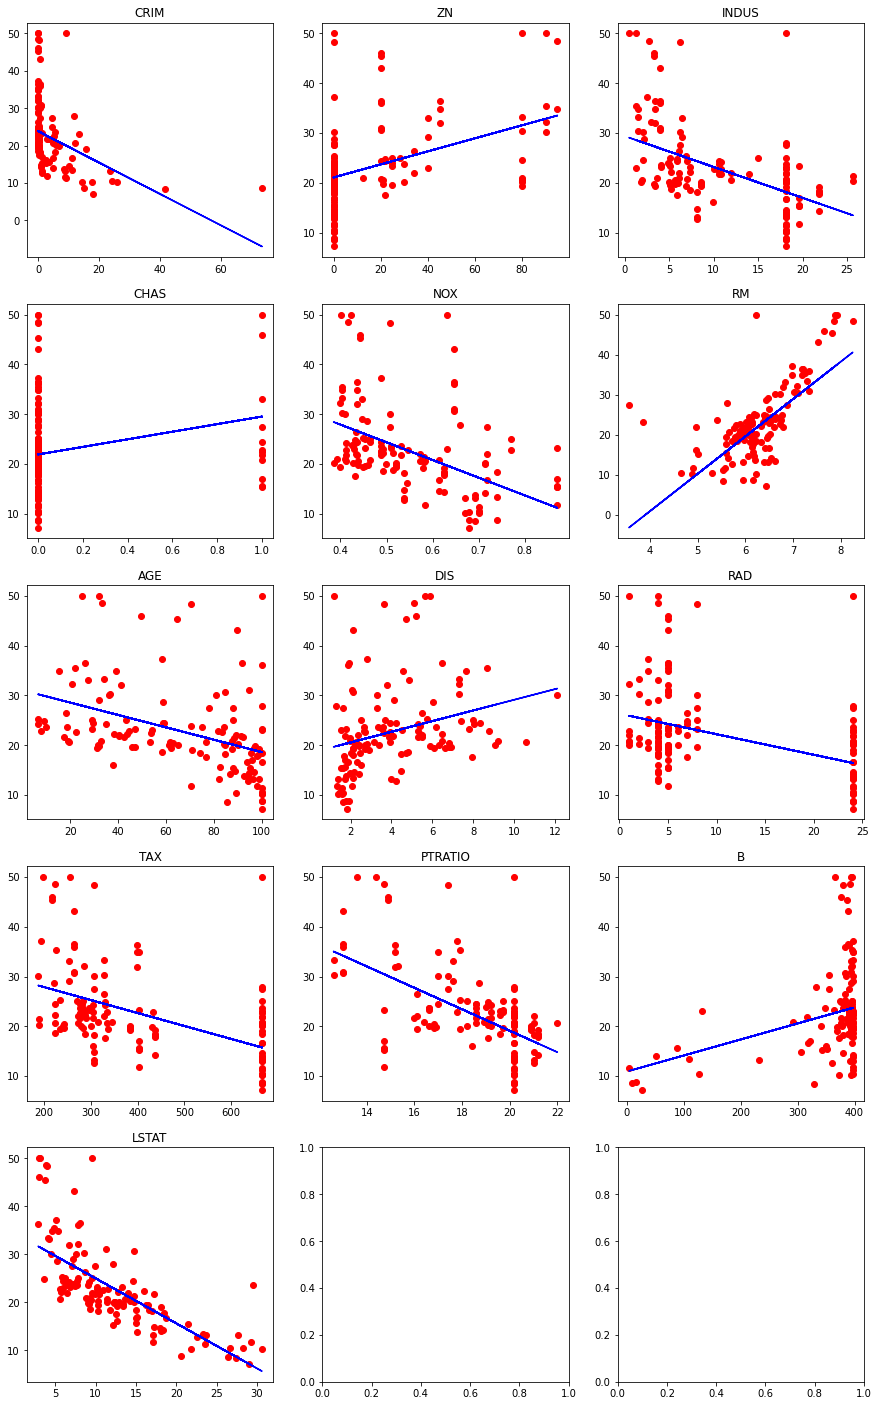

In [47]:
fig,ax = plt.subplots(5,3 , figsize=(15,25))
counter = 0

for i in range(0 , 5):
    for j in range(0 , 3):
        
        if counter == 13 :
            break
        
        # Selecting each feature for simple linear regression
        X = dataset[[x.columns[counter]]]
        
        # Splitting the data set into train and test 
        x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=26)
        
        # Training model
        regressor = LinearRegression()
        regressor.fit(x_train , y_train)
        
        # Predicting result with test
        y_pred = regressor.predict(x_test)
        
        print(f'R^2 for {x.columns[counter]} : {metrics.r2_score(y_test , y_pred)}')
        
        ax[i,j].scatter(x_test , y_test , color='red')
        ax[i,j].plot(x_test , y_pred , color='blue')
        ax[i,j].set_title(x.columns[counter])
        counter +=1
        
plt.show()

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Multiple linear regression - Using features with high R^2 Scores</h2>
</div>

In [48]:
x = dataset[['INDUS' , 'RM' , 'PTRATIO' , 'LSTAT']]
x

,INDUS,RM,PTRATIO,LSTAT
0,2.31,6.575,15.3,4.98
1,7.07,6.421,17.8,9.14
2,7.07,7.185,17.8,4.03
3,2.18,6.998,18.7,2.94
4,2.18,7.147,18.7,5.33
...,...,...,...,...
501,11.93,6.593,21.0,9.67
502,11.93,6.120,21.0,9.08
503,11.93,6.976,21.0,5.64
504,11.93,6.794,21.0,6.48


In [49]:
y = dataset['Price']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)
regressor = LinearRegression()
regressor.fit(x_train , y_train)        

LinearRegression()

In [51]:
coefficient = pd.DataFrame([x_train.columns , regressor.coef_]).T
coefficient = coefficient.rename(columns={0 : 'Attr' , 1 : 'Coef'})
coefficient

,Attr,Coef
0,INDUS,0.004727
1,RM,4.853536
2,PTRATIO,-0.960571
3,LSTAT,-0.537926


In [52]:
regressor.intercept_

16.387716889269473

In [53]:
y_pred = regressor.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Count'>

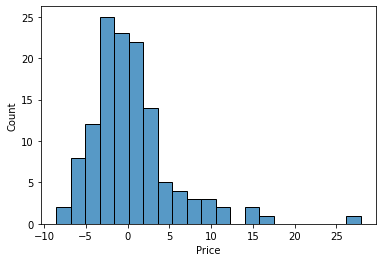

In [54]:
sns.histplot(y_test - y_pred)

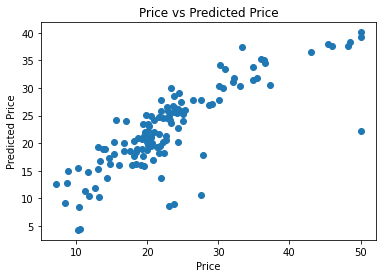

In [55]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

In [56]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 3.4687357957147995
MSE : 26.422202686840976
RMSE : 5.140253173418696
R^2 : 0.6784594521429672


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression</h2>
</div>

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
x = dataset[['RM']]
y = dataset['Price']

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)

In [60]:
poly_feature = PolynomialFeatures(degree=2)

In [61]:
x_train_quadratic = poly_feature.fit_transform(x_train)

In [62]:
quadratic = LinearRegression()
quadratic.fit(x_train_quadratic , y_train)

LinearRegression()

In [63]:
quadratic.coef_

array([  0.        , -14.43824734,   1.82295138])

In [64]:
quadratic.intercept_

40.11492583966596

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression - Evaluation with train data</h2>
</div>

In [65]:
y_pred = quadratic.predict(x_train_quadratic)

<AxesSubplot:xlabel='Price', ylabel='Count'>

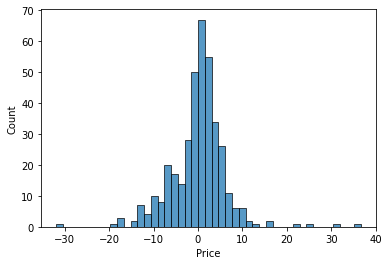

In [66]:
sns.histplot(y_train - y_pred)

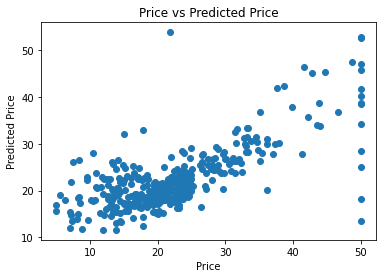

In [67]:
plt.scatter(y_train , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

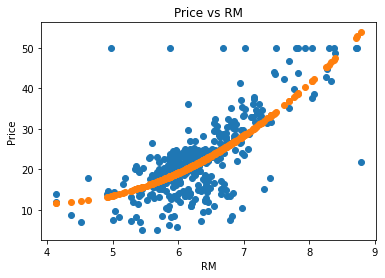

In [68]:
plt.scatter(x_train , y_train)
plt.scatter(x_train , y_pred)
plt.title('Price vs RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

In [69]:
print(f'MAE : {metrics.mean_absolute_error(y_train , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_train , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_train , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_train , y_pred)}')

MAE : 4.268513478866645
MSE : 40.152122975801625
RMSE : 6.336570284925562
R^2 : 0.527961893272863


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression - Evaluation with test data</h2>
</div>

In [70]:
y_pred = quadratic.predict(poly_feature.fit_transform(x_test))

<AxesSubplot:xlabel='Price', ylabel='Count'>

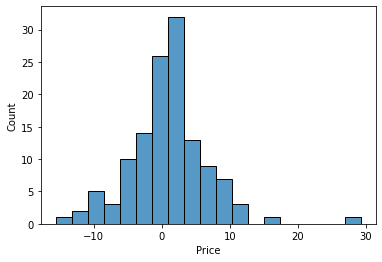

In [71]:
sns.histplot(y_test - y_pred)

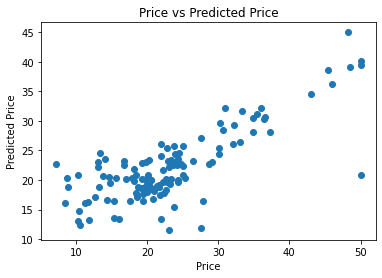

In [72]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

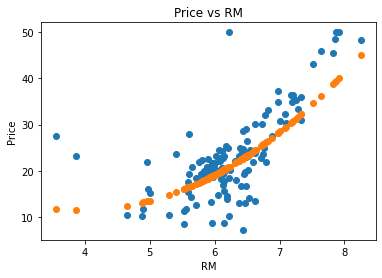

In [73]:
plt.scatter(x_test , y_test)
plt.scatter(x_test , y_pred)
plt.title('Price vs RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

In [74]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 4.214100600084425
MSE : 33.85163000934446
RMSE : 5.818215362922247
R^2 : 0.5880482869628778


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression - Degree 3</h2>
</div>

In [75]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)

In [76]:
poly_feature = PolynomialFeatures(degree=3)
x_train_quadratic = poly_feature.fit_transform(x_train)

In [77]:
quadratic = LinearRegression()
quadratic.fit(x_train_quadratic , y_train)

LinearRegression()

In [78]:
quadratic.intercept_

225.0036575175276

In [79]:
quadratic.coef_

array([   0.        , -102.86295191,   15.6861393 ,   -0.71218968])

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression (Deg = 3) - Evaluation with train data</h2>
</div>

In [80]:
y_pred = quadratic.predict(x_train_quadratic)

<AxesSubplot:xlabel='Price', ylabel='Count'>

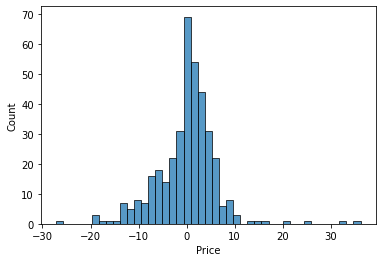

In [81]:
sns.histplot(y_train - y_pred)

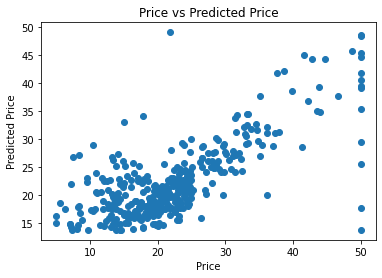

In [82]:
plt.scatter(y_train , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

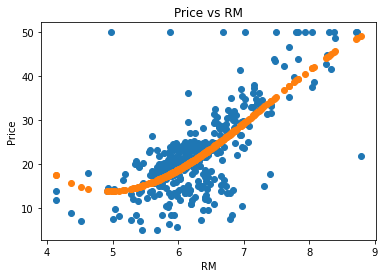

In [83]:
plt.scatter(x_train , y_train)
plt.scatter(x_train , y_pred)
plt.title('Price vs RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

In [84]:
print(f'MAE : {metrics.mean_absolute_error(y_train , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_train , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_train , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_train , y_pred)}')

MAE : 4.27102854108163
MSE : 39.44404511355234
RMSE : 6.280449435633754
R^2 : 0.5362862285443251


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression (Deg = 3) - Evaluation with test data</h2>
</div>

In [85]:
y_pred = quadratic.predict(poly_feature.fit_transform(x_test))

<AxesSubplot:xlabel='Price', ylabel='Count'>

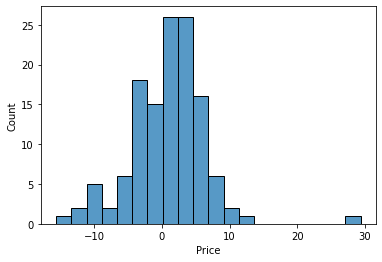

In [86]:
sns.histplot(y_test - y_pred)

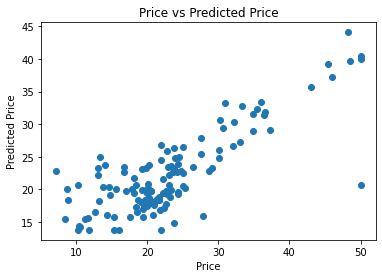

In [87]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

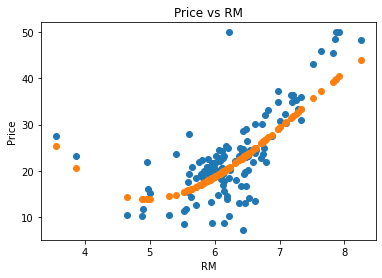

In [88]:
plt.scatter(x_test , y_test)
plt.scatter(x_test , y_pred)
plt.title('Price vs RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

In [89]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 4.0464963113954
MSE : 30.43229217274519
RMSE : 5.516547124129838
R^2 : 0.6296593431764452


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression - All Features</h2>
</div>

In [90]:
x = dataset.iloc[: , :-1]
y = dataset['Price']

In [91]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=26)
poly_feature = PolynomialFeatures(degree=2)
x_train_quadratic = poly_feature.fit_transform(x_train)
quadratic = LinearRegression()
quadratic.fit(x_train_quadratic , y_train)

LinearRegression()

In [92]:
quadratic.intercept_

790242763.584107

In [93]:
quadratic.coef_

array([-7.90242936e+08, -1.67125931e+00,  3.08137080e-01, -5.21716116e+00,
        2.87862004e+01,  1.65139850e+02,  2.12459584e+01,  1.10994322e+00,
       -8.60889885e+00,  2.80642379e+00, -9.93253235e-02,  6.81842199e+00,
        1.25352122e-01,  5.92162793e-01,  1.86132455e-03,  3.84055612e-02,
        6.19058760e-01,  2.30893375e+00, -9.07799946e-01,  9.80224326e-02,
        3.98621931e-03,  6.22708931e-02,  4.95935871e-01, -4.50933284e-02,
        3.83123516e-01, -2.18174168e-04,  8.03006415e-03,  5.24153224e-04,
       -9.98927795e-03,  4.04522493e-03, -9.24178076e-01, -7.07757706e-02,
        5.26474874e-04, -2.51627651e-02, -1.01270828e-03,  4.41080852e-04,
       -1.05023129e-02,  1.93299983e-03, -7.63238807e-05, -8.37754301e-04,
       -3.75914910e-02,  1.77421496e+00,  1.60661888e-01,  7.44847915e-03,
        1.59466214e-01,  5.09052428e-03,  1.17290611e-03,  1.53130354e-03,
        4.83749621e-03,  2.67047525e-03,  2.87861975e+01, -3.47546086e+01,
       -5.36673377e+00, -

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression (All Features) - Evaluation with train data</h2>
</div>

In [94]:
y_pred = quadratic.predict(x_train_quadratic)

<AxesSubplot:xlabel='Price', ylabel='Count'>

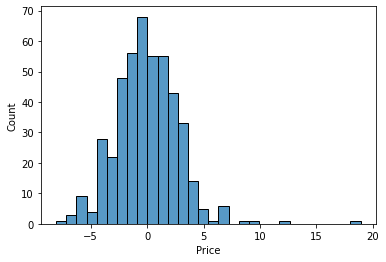

In [95]:
sns.histplot(y_train - y_pred)

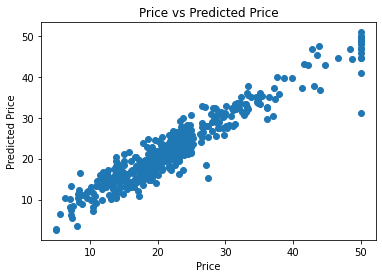

In [96]:
plt.scatter(y_train , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

In [97]:
print(f'MAE : {metrics.mean_absolute_error(y_train , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_train , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_train , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_train , y_pred)}')

MAE : 2.1281234986441477
MSE : 7.916928018872382
RMSE : 2.813703612478113
R^2 : 0.9050839810219937


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression (All Features) - Evaluation with test data</h2>
</div>

In [98]:
y_pred = quadratic.predict(poly_feature.fit_transform(x_test))

<AxesSubplot:xlabel='Price', ylabel='Count'>

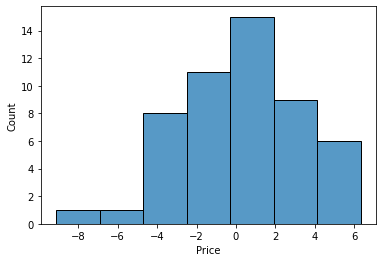

In [99]:
sns.histplot(y_test - y_pred)

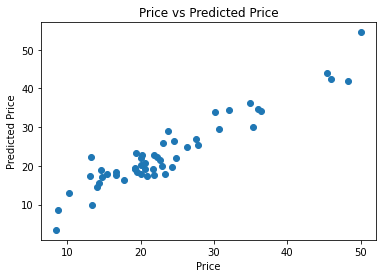

In [100]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

In [101]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 2.5396736444211467
MSE : 9.897947184103646
RMSE : 3.146100313738207
R^2 : 0.8930254004049123


<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression for each feature - Visualization</h2>
</div>

R^2 for CRIM : 0.21883300215024248
R^2 for ZN : 0.2428886912281254
R^2 for INDUS : 0.40999483100376377
R^2 for CHAS : 0.0847860432213915
R^2 for NOX : 0.2680532447280656
R^2 for RM : 0.6697835065756192
R^2 for AGE : 0.2135510595858624
R^2 for DIS : 0.1306663186714333
R^2 for RAD : 0.16790227263958557
R^2 for TAX : 0.29255204559239023
R^2 for PTRATIO : 0.4307921550505259
R^2 for B : 0.10632407813898659
R^2 for LSTAT : 0.6812014193170265


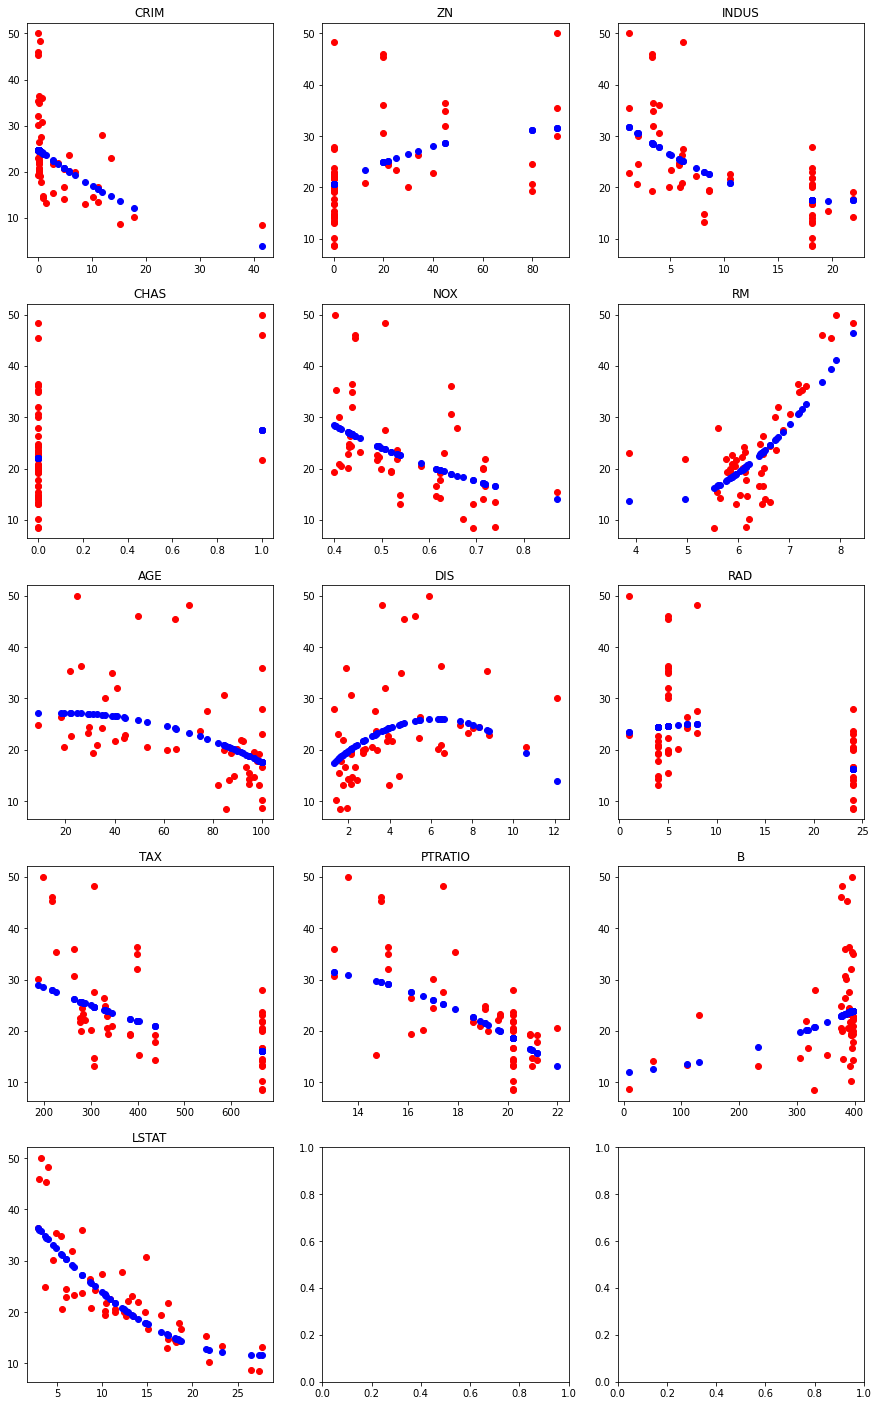

In [102]:
fig,ax = plt.subplots(5,3 , figsize=(15,25))
counter = 0

for i in range(0 , 5):
    for j in range(0 , 3):
        
        if counter == 13 :
            break
        
        # Selecting each feature for simple linear regression
        X = dataset[[x.columns[counter]]]
        
        # Splitting the data set into train and test 
        x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , random_state=26)
        
        # Training model
        poly_feature = PolynomialFeatures(degree=2)
        x_train_quadratic = poly_feature.fit_transform(x_train)
        
        quadratic = LinearRegression()
        quadratic.fit(x_train_quadratic , y_train)
        
        # Predicting result with test
        y_pred = quadratic.predict(poly_feature.fit_transform(x_test))
        
        print(f'R^2 for {x.columns[counter]} : {metrics.r2_score(y_test , y_pred)}')
        
        ax[i,j].scatter(x_test , y_test , color='red')
        ax[i,j].scatter(x_test , y_pred , color='blue')
        ax[i,j].set_title(x.columns[counter])
        counter +=1
        
plt.show()

<div align='center' style='background-color:#b3eecc;padding:20px'>
    <h2 style='color:#114d2a;'>Polynomial regression accuracy for each added feature - Visualization</h2>
</div>

R^2 for 1 Feature : 0.21883300215024248
R^2 for 2 Feature : 0.2544870961485761
R^2 for 3 Feature : 0.3260790280035212
R^2 for 4 Feature : 0.41719640214586373
R^2 for 5 Feature : 0.38055030478646457
R^2 for 6 Feature : 0.8163043749341892
R^2 for 7 Feature : 0.8238007473907449
R^2 for 8 Feature : 0.7960905792858737
R^2 for 9 Feature : 0.7922385475606486
R^2 for 10 Feature : 0.8084288038809071
R^2 for 11 Feature : 0.8524537147207414
R^2 for 12 Feature : 0.7828868154772445
R^2 for 13 Feature : 0.8930254004049123


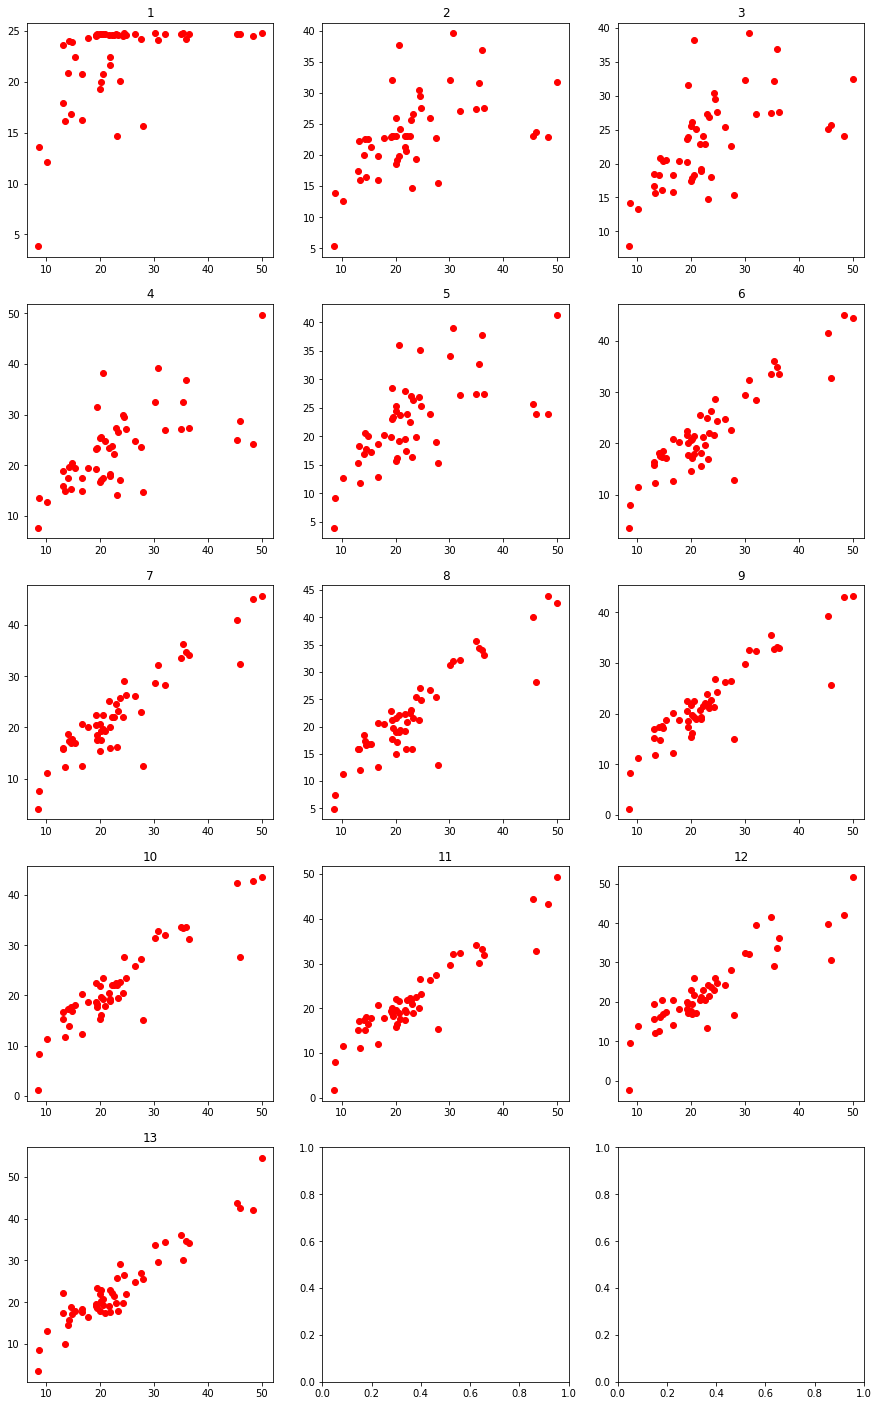

In [103]:
fig,ax = plt.subplots(5,3 , figsize=(15,25))
counter = 0

for i in range(0 , 5):
    for j in range(0 , 3):
        
        if counter == 13 :
            break
        
        # Selecting each feature for simple linear regression
        X = dataset.iloc[: , 0:counter + 1]
        
        # Splitting the data set into train and test 
        x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , random_state=26)
        
        # Training model
        poly_feature = PolynomialFeatures(degree=2)
        x_train_quadratic = poly_feature.fit_transform(x_train)
        
        quadratic = LinearRegression()
        quadratic.fit(x_train_quadratic , y_train)
        
        # Predicting result with test
        y_pred = quadratic.predict(poly_feature.fit_transform(x_test))
        
        print(f'R^2 for {counter + 1} Feature : {metrics.r2_score(y_test , y_pred)}')
        
        ax[i,j].scatter(y_test , y_pred , color='red')
        ax[i,j].set_title(counter + 1)
        counter +=1
        
plt.show()